In [2]:
import os
os.chdir('/data/l989o/deployed/a')
import sys
if '/data/l989o/a' in sys.path:
    sys.path.remove('/data/l989o/a')

In [3]:
from data import RawMeanDataset, RawMean12, NatureBImproved, NatureBOriginal, TransformedMeanDataset
import h5py
from data import file_path
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import torch
import matplotlib
import shutil
import cv2

True
<KeysViewHDF5 ['count', 'maximum', 'mean', 'sum', 'variance']>


In [3]:
class A:
    def __init__(self, model, model_id):
        self.model = model
        self.model_id = model_id
        self.instance = model + '_' + model_id
        if self.model_id == 'raw_mean_dataset':
            self.dataset = RawMeanDataset
        elif self.model_id == 'raw_mean12':
            self.dataset = RawMean12
        elif self.model_id == 'nature_b_improved':
            self.dataset = NatureBImproved
        elif self.model_id == 'nature_b_original':
            self.dataset = NatureBOriginal
        elif self.model_id == 'transformed_mean_dataset':
            self.dataset = TransformedMeanDataset
        else:
            raise ValueError(self.instance)
        self.ds_train = self.dataset('train')
        self.ds_validation = self.dataset('validation')

instances = [A('model_name', 'raw_mean_dataset'), A('vae', 'raw_mean12'), A('vae', 'nature_b_improved'), A('vae', 'nature_b_original'), A('vae', 'transformed_mean_dataset')]

for i, ii in enumerate(instances):
    print(i, ii.instance)

  0%|          | 0/389 [00:00<?, ?it/s]/data/l989o/deployed/a/data.py:260: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x0 = torch.tensor(x0, dtype=torch.float)
100%|██████████| 45/45 [00:00<00:00, 200.99it/s]

0 model_name_raw_mean_dataset
1 vae_raw_mean12
2 vae_nature_b_improved
3 vae_nature_b_original
4 vae_transformed_mean_dataset


In [4]:
i0 = instances[0]
i4 = instances[4]

In [5]:
all_k = set()
for instance in instances:
    o_train = instance.ds_train.filenames     
    l = []
    for i, o in enumerate(tqdm(o_train, desc='train')):
        original = instance.ds_train[i]
        l.append(original.clone())
    instance.x_train = torch.cat(l, dim=0)
    
    o_validation = instance.ds_validation.filenames
    l = []
    for i, o in enumerate(tqdm(o_validation, desc='validation')):
        original = instance.ds_validation[i]
        l.append(original.clone())
    instance.x_validation = torch.cat(l, dim=0)

train:   0%|          | 0/389 [00:00<?, ?it/s]/data/l989o/deployed/a/data.py:237: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(z, dtype=torch.float)
validation: 100%|██████████| 45/45 [00:00<00:00, 170.44it/s]


In [142]:
print(len(i0.x_train))

762354


# Cells distributions

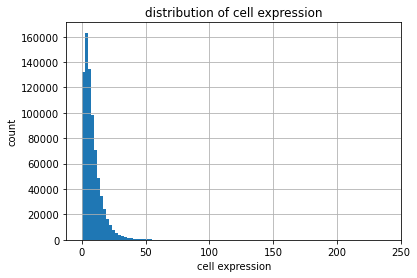

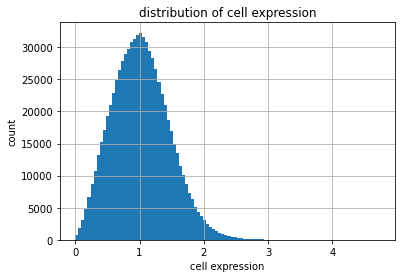

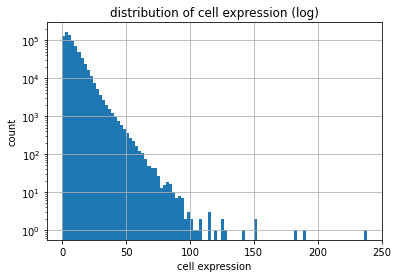

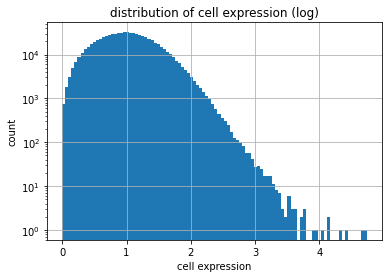

In [144]:
_ = plt.hist(i0.x_train[:, 0].numpy(), bins=100)
plt.grid()
plt.title('distribution of cell expression')
plt.xlabel('cell expression')
plt.ylabel('count')
plt.show()

_ = plt.hist(i4.x_train[:, 0].numpy(), bins=100)
plt.grid()
plt.title('distribution of cell expression')
plt.xlabel('cell expression')
plt.ylabel('count')
plt.show()

_ = plt.hist(i0.x_train[:, 0].numpy(), bins=100)
plt.yscale('log')
plt.grid()
plt.title('distribution of cell expression (log)')
plt.xlabel('cell expression')
plt.ylabel('count')
plt.show()

_ = plt.hist(i4.x_train[:, 0].numpy(), bins=100)
plt.yscale('log')
plt.grid()
plt.title('distribution of cell expression (log)')
plt.xlabel('cell expression')
plt.ylabel('count')
plt.show()

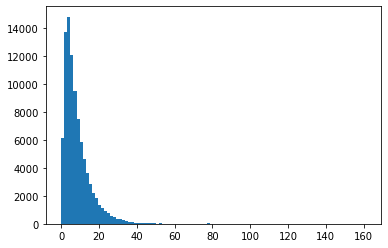

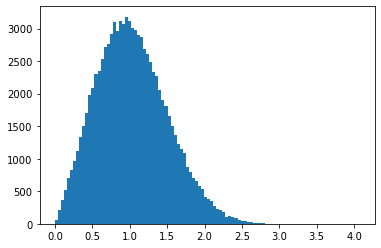

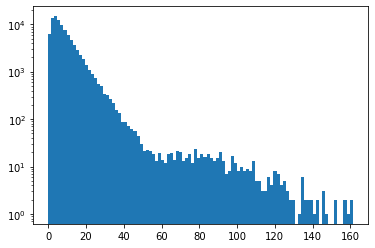

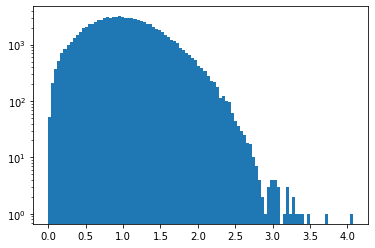

In [39]:
_ = plt.hist(i0.x_validation[:, 0].numpy(), bins=100)
plt.show()

_ = plt.hist(i4.x_validation[:, 0].numpy(), bins=100)
plt.show()

_ = plt.hist(i0.x_validation[:, 0].numpy(), bins=100)
plt.yscale('log')
plt.show()

_ = plt.hist(i4.x_validation[:, 0].numpy(), bins=100)
plt.yscale('log')
plt.show()

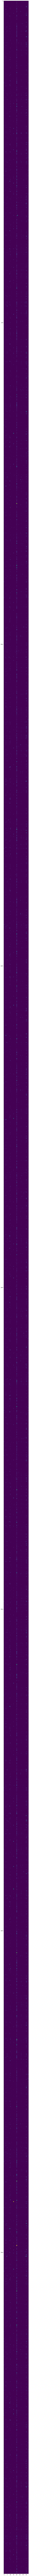

In [59]:
x = i0.x_train
l = len(x)
r = np.random.choice(l, 4000)

plt.figure(figsize=(10, 500))
plt.imshow(x[r, :])
plt.show()

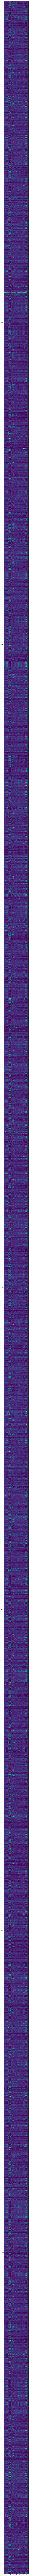

In [60]:
x = i4.x_train

l = len(x)
r = np.random.choice(l, 4000)

plt.figure(figsize=(10, 500))
plt.imshow(x[r, :])
plt.show()

# Movies

In [217]:
import glob
from PIL import Image
import os
print(os.getcwd())
print(file_path('movies'))
shutil.rmtree(file_path('movies/0'))
shutil.rmtree(file_path('movies/4'))
os.makedirs(file_path('movies'), exist_ok=True)
os.makedirs(file_path('movies/0'), exist_ok=True)
os.makedirs(file_path('movies/4'), exist_ok=True)

In [260]:
matplotlib.use('Agg')
n = 30
ff = i0.ds_train.filenames
np.random.seed(2)
r = np.random.choice(len(ff), n, replace=False)
xxxxx = i0.x_train.numpy()
c999 = np.quantile(xxxxx, 0.999)
for i, rr in enumerate(r):
    o = ff[rr]
    x = i0.ds_train[rr]
    rrr = np.random.choice(len(x), min(len(x), 150), replace=False)
    x = x[rrr, :]
    y = len(x)
    fig = plt.figure(figsize=(3 + 1.2, y / 39 * 3))
    plt.imshow(x, interpolation='none')
    f = file_path(f'movies/0/{i:04d}.png')
    plt.title(f'ome {rr}')
    plt.xlabel('channel')
    plt.ylabel('cell')
    plt.clim((0, c999))
    plt.colorbar()
    plt.suptitle('plotting 150 random cells from random omes\ncolorbar clipped at quantile 0.999')#, y=0.995)
    plt.tight_layout() #rect=[0, 0, 1, 0.95])
    plt.savefig(f, bbox_inches='tight', dpi=300) #, bbox_extra_artists=(suptitle, ))
#     plt.show()
    plt.close(fig)
%matplotlib inline

In [265]:
matplotlib.use('Agg')
n = 30
ff = i4.ds_train.filenames
np.random.seed(2)
c_min, c_max = torch.min(i4.x_train).item(), torch.max(i4.x_train).item()
r = np.random.choice(len(ff), n, replace=False)
for i, rr in enumerate(r):
    o = ff[rr]
    x = i4.ds_train[rr]
    rrr = np.random.choice(len(x), min(len(x), 150), replace=False)
    x = x[rrr, :]
    y = len(x)
    fig = plt.figure(figsize=(3 + 1.2, y / 39 * 3))
    plt.imshow(x, interpolation='none')
    f = file_path(f'movies/4/{i:04d}.png')
    plt.title(f'ome {rr}')
    plt.xlabel('channel')
    plt.ylabel('cell')
    plt.clim((c_min, c_max))
    plt.colorbar()
    plt.suptitle('plotting 150 random cells from random omes\n')#, y=0.995)
    plt.tight_layout()
    plt.savefig(f, bbox_inches='tight', dpi=300)
    plt.close(fig)
%matplotlib inline

In [267]:
fp_in = file_path('movies/0/*.png')
fp_out = file_path('movies/0.gif')

img, *imgs = [Image.open(f) for f in sorted(glob.glob(fp_in))]
img.save(fp=fp_out, format='GIF', append_images=imgs,
         save_all=True, duration=1000, loop=0)

fp_in = file_path('movies/4/*.png')
fp_out = file_path('movies/4.gif')

img, *imgs = [Image.open(f) for f in sorted(glob.glob(fp_in))]
img.save(fp=fp_out, format='GIF', append_images=imgs,
         save_all=True, duration=1000, loop=0)

# Back to cells distirbutions

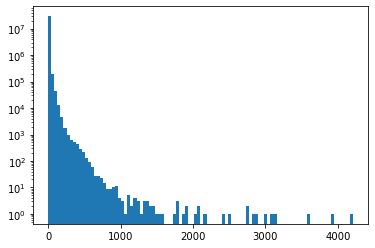

0.0181818176060915
0.06468293070793152


In [113]:
x = i0.x_train.numpy()

plt.figure()
plt.hist(x.flatten(), bins=100)
plt.yscale('log')
plt.show()

print(np.quantile(x.flatten(), 0.02))
print(np.quantile(x.flatten(), 0.09))

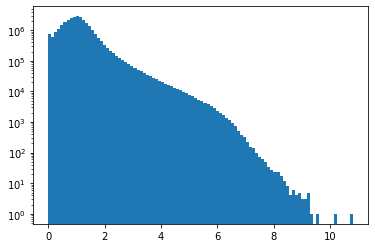

0.06644641682505606


In [111]:
x = i4.x_train.numpy()

plt.figure()
plt.hist(x.flatten(), bins=100)
plt.yscale('log')
plt.show()


print(np.quantile(x.flatten(), 0.02))

In [80]:
x0 = i0.x_train.numpy()
x4 = i4.x_train.numpy()

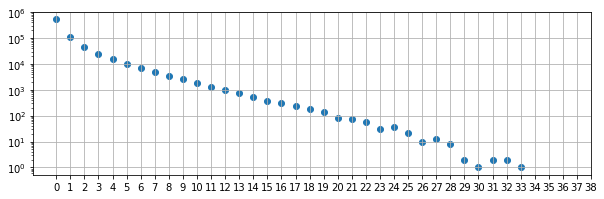

In [119]:
q = np.quantile(x0.flatten(), 0.02)
a = np.sum(x0 <= q, axis=1)
plt.figure(figsize=(10, 3))
u, c = np.unique(a, return_counts=True)
plt.scatter(u, c)
plt.yscale('log')
plt.xticks(list(range(39)))
plt.grid()
plt.show()

[5.07692308e+00 2.07435897e+01 4.51615385e+02 8.46153846e-01
 9.87948718e+01 2.71230769e+02 2.10717949e+02 2.53717949e+02
 7.50948718e+02 1.90692308e+02 6.29384615e+02 1.70589744e+02
 7.09230769e+01 1.10569231e+03 2.41692308e+02 2.56641026e+02
 4.09974359e+02 7.87179487e+02 2.20256410e+01 1.15771795e+03
 5.12820513e-02 4.72564103e+01 7.77948718e+02 4.77743590e+02
 1.16284615e+03 5.54076923e+02 7.70000000e+01 2.12820513e+01
 1.15487179e+03 7.27435897e+01 1.94871795e+00 2.15102564e+02
 1.01905128e+03 1.86666667e+01 2.14712821e+03 3.70051282e+02
 5.04871795e+01 1.18717949e+01 3.15384615e+00]


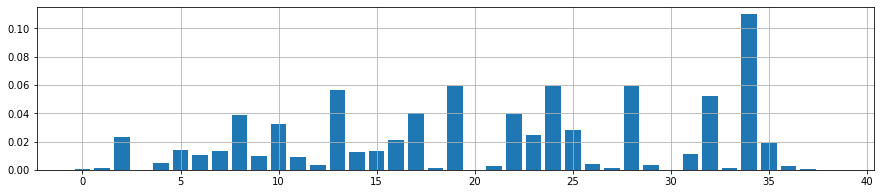

In [140]:
q = np.quantile(x0.flatten(), 0.02)
a = np.sum(x0 <= q, axis=0)
print(a / len(a))
plt.figure(figsize=(15, 3))
plt.bar(np.arange(39), a / len(x0))
# plt.yscale('log')
plt.grid()
plt.show()

In [120]:
len(x0.flatten()[x0.flatten() <= q]) / len(x0.flatten())

0.020055626624228613

In [118]:
a = x0.flatten()
print(len(a))
q = np.quantile(a, 0.02)
print(q)
print(np.sum(a <= q) / len(a))
print(len(a[a <= q]) / len(a))

29731806
0.0181818176060915
0.020055626624228613
0.020055626624228613


0.06644641682505606


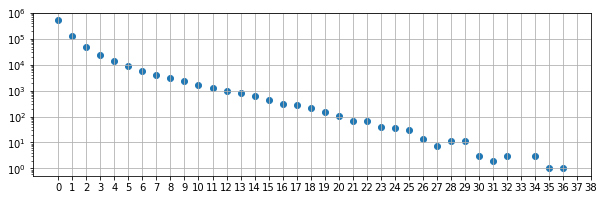

In [121]:
q = np.quantile(x4.flatten(), 0.02)
print(q)
a = np.sum(x4 <= q, axis=1)
plt.figure(figsize=(10, 3))
u, c = np.unique(a, return_counts=True)
plt.scatter(u, c)
plt.yscale('log')
plt.xticks(list(range(39)))
plt.grid()
plt.show()

# Raw data distributions

In [18]:
from data import OmeDataset
ds = OmeDataset('train')
print(len(ds))
ds[1].shape

389


torch.Size([421, 833, 39])

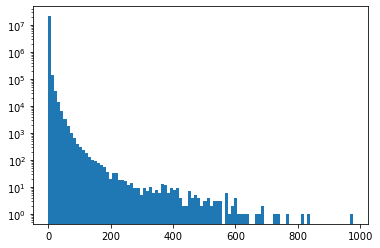

In [7]:
plt.hist(ds[0].numpy().flatten(), bins=100)
plt.yscale('log')
plt.show()

In [287]:
l = []
for d in tqdm(ds, desc='concatenating all pixels'):
    v = d.numpy().flatten()
    l.append(v)

In [334]:
s = 0
for ll in l:
    s += len(ll)
s

6005140245

In [291]:
big_min = 1000000
big_max = -1
for ll in l:
    big_min = min(big_min, np.min(ll))
    big_max = max(big_max, np.max(ll))

In [296]:
big_min, big_max

(0.0, 45857.688)

In [328]:
a = np.arange(0, big_max, 10).tolist()
# b = np.arange(10000, big_max, 5000).tolist()
# print(a)
# print()
# print(b)
# print()
# bins = np.array(a + b)
bins = np.array(a)
# print(bins.tolist())

In [331]:
my_hist = np.zeros(len(bins) - 1, dtype='int32')
for ll in tqdm(l, desc='computing histogram'):
    h, c = np.histogram(ll, bins)
#     print(h)
#     print(c)
    my_hist += h

computing histogram: 100%|██████████| 389/389 [02:08<00:00,  3.04it/s]


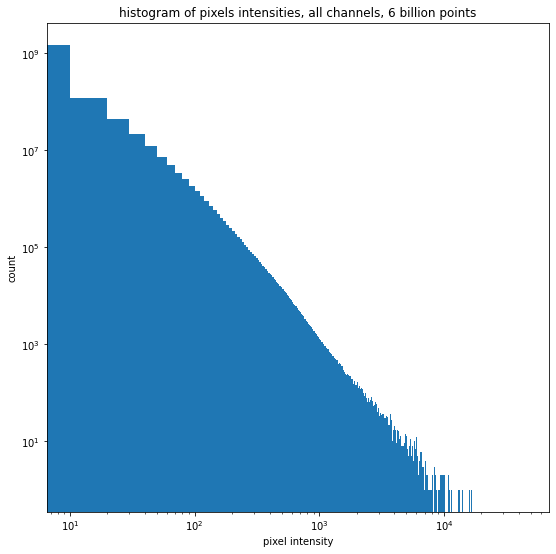

In [339]:
width = np.diff(bins)
center = (bins[:-1] + bins[1:]) / 2
plt.figure(figsize=(9, 9))
plt.bar(center, my_hist, align='center', width=width)
plt.title('histogram of pixels intensities, all channels, 6 billion points')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('pixel intensity')
plt.ylabel('count')
plt.show()

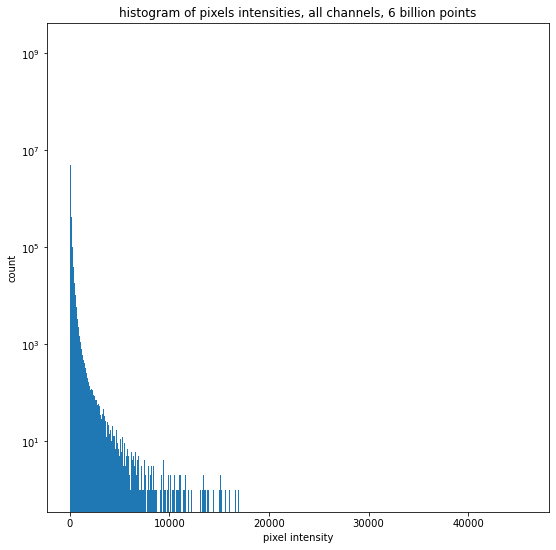

In [340]:
width = np.diff(bins)
center = (bins[:-1] + bins[1:]) / 2
plt.figure(figsize=(9, 9))
plt.bar(center, my_hist, align='center', width=width)
plt.title('histogram of pixels intensities, all channels, 6 billion points')
plt.yscale('log')
plt.xlabel('pixel intensity')
plt.ylabel('count')
plt.show()

torch.Size([688, 762, 39])

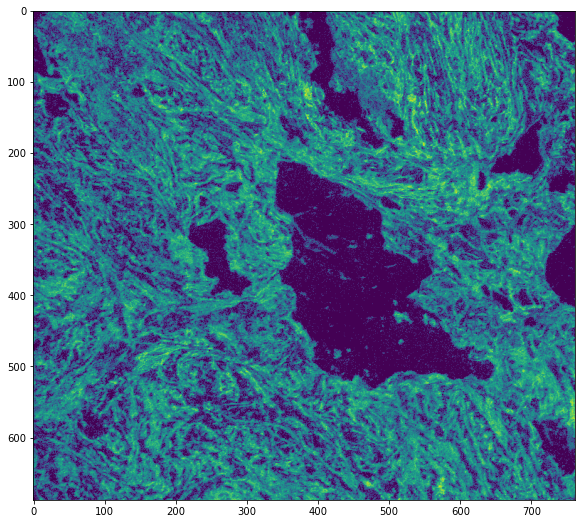

In [15]:
plt.figure(figsize=(16, 9))
plt.imshow(np.arcsinh(ds[15][:, :, 20].numpy()))
ds[15].shape

In [16]:
# from Jonas
def hot_pixel_filter(img: Union[np.ndarray, MultichannelImage], hot_pixel_thres: float,
                     inplace: bool = False) -> Union[np.ndarray, MultichannelImage]:
    """Hot pixel filter as implemented in https://github.com/BodenmillerGroup/ImcPluginsCP

    Sets all hot pixels to the maximum of their 8-neighborhood. Hot pixels are defined as pixels, whose values are
    larger by ``hot_pixel_thres`` than the maximum of their 8-neighborhood.

    :param img: raw image data, shape: ``(c, y, x)``
    :param hot_pixel_thres: hot pixel threshold
    :param inplace: if ``True``, the image is modified in-place
    :return: The hot pixel-filtered image
    """
    if isinstance(img, MultichannelImage):
        return _apply_to_multichannel_image(hot_pixel_filter, locals())
    if img.ndim != 3:
        raise ValueError(f'Invalid number of image dimensions: expected 3, got {img.ndim}')
    kernel = np.ones((3, 3), dtype=np.uint8)
    kernel[1, 1] = 0
    if cv2 is not None:
        max_neighbor_img = cv2.dilate(np.moveaxis(img, 0, 2), kernel, iterations=1, borderType=cv2.BORDER_REFLECT101)
        if np.ndim(max_neighbor_img) == 2:
            max_neighbor_img = np.expand_dims(max_neighbor_img, 2)
        max_neighbor_img = np.moveaxis(max_neighbor_img, 2, 0)
    else:
        max_neighbor_img = filters.maximum_filter(kernel[None, :, :], footprint=kernel, mode='mirror')
    filter_mask = (img - max_neighbor_img) > hot_pixel_thres
    if not inplace:
        img = img.copy()
    img[filter_mask] = max_neighbor_img[filter_mask]
    return img

NameError: name 'Union' is not defined

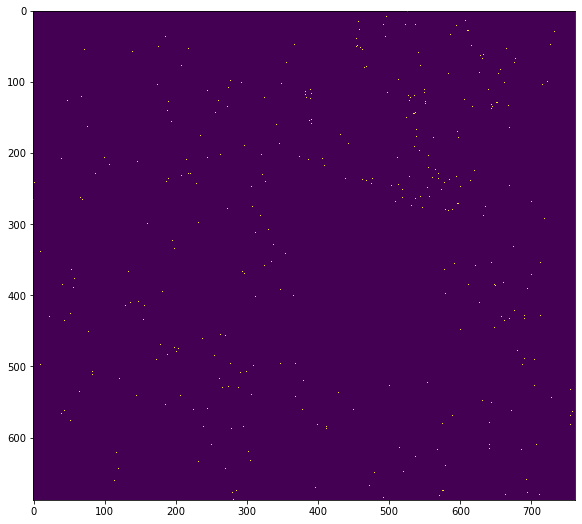

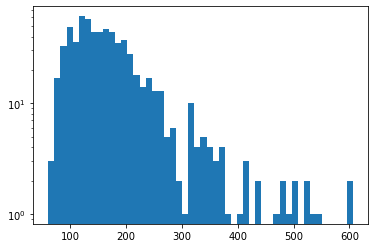

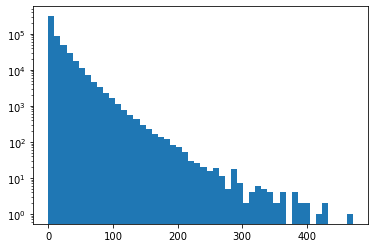

In [19]:
im = ds[15][:, :, 20].numpy()
import cv2

kernel = np.ones((3, 3), dtype=np.uint8)
kernel[1, 1] = 0
maxs = cv2.dilate(im, kernel, iterations=1, borderType=cv2.BORDER_REFLECT101)
mask = im - maxs >= 50

plt.figure(figsize=(16, 9))
plt.imshow(mask, interpolation='none')
a = im[mask].flatten()
b = im[~mask].flatten()

plt.figure()
plt.hist(a, bins=50)
plt.yscale('log')

plt.figure()
plt.hist(b, bins=50)
plt.yscale('log')

In [63]:
from torch.utils.data import Dataset
from splits import *
import skimage
import skimage.io

class A(Dataset):
    # ome_normalization_method -1 for raw data
    def __init__(self, split):
        super().__init__()
        self.split = split
        assert split in ['train', 'validation', 'test']
        if split == 'train':
            self.filenames = train
        elif split == 'validation':
            self.filenames = validation
        elif split == 'test':
            self.filenames = test
        self.channels_count = self.__getitem__(0)[0].shape[2]

    def __len__(self):
        return len(self.filenames)

    def __getitem__(self, i):
        filename = self.filenames[i]
        f = os.path.join('data/OMEandSingleCellMasks/ome/', filename)
        ome = skimage.io.imread(f)
        ome = np.moveaxis(ome, 0, 2)
        to_keep = [8, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                   23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
                   36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]
        ome = ome[:, :, to_keep]

        kernel = np.ones((3, 3), dtype=np.uint8)
        kernel[1, 1] = 0
        maxs = cv2.dilate(ome, kernel, iterations=1, borderType=cv2.BORDER_REFLECT101)
        mask = ome - maxs >= 50
        c = ome[mask] - maxs[mask]
        a = np.sum(c)
        b = np.sum(ome)
        ome[mask] = maxs[mask]

        ome = torch.from_numpy(ome).float()
        return ome, np.sum(mask), ome.numel(), a, b

In [64]:
fractions = []
aa = []
bb = []
for ome, hot, total, a, b in tqdm(A('train'), desc='counting hot pixels'):
    fractions.append(hot / total)
    aa.append(a)
    bb.append(b)
a = np.array(fractions)

counting hot pixels: 100%|██████████| 389/389 [02:29<00:00,  2.60it/s]


Text(0, 0.5, 'ome count')

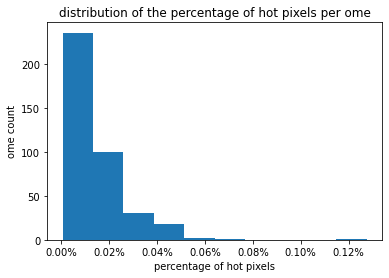

In [91]:
## plt.figure(figsize=(9, 9))
plt.hist(a * 100)
ax = plt.gca()
import matplotlib.ticker
ax.xaxis.set_major_formatter(matplotlib.ticker.PercentFormatter(decimals=2))
np.mean(a) * 100
plt.title('distribution of the percentage of hot pixels per ome')
plt.xlabel('percentage of hot pixels')
plt.ylabel('ome count')

Text(0, 0.5, 'ome count')

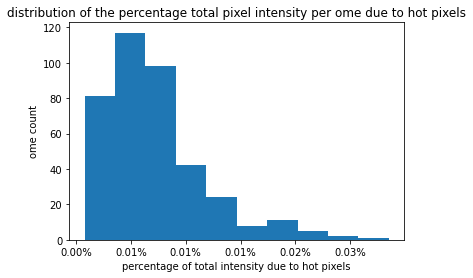

In [92]:
plt.hist(np.array(aa) / np.array(bb))
np.mean(np.sum(np.array(aa)) / np.sum(np.array(bb))) * 100
ax = plt.gca()
ax.xaxis.set_major_formatter(matplotlib.ticker.PercentFormatter(decimals=2))
plt.title('distribution of the percentage total pixel intensity per ome due to hot pixels')
plt.xlabel('percentage of total intensity due to hot pixels')
plt.ylabel('ome count')

## Removed

In [ ]:
from data import OmeDatasetHotPixelsRemoved, OmeDataset

ds_a = OmeDataset('train')
ds_b = OmeDatasetHotPixelsRemoved('train')
print(len(ds_a))

for i in [15]:
    mask = ds_a[i] != ds_b[i]
    mask = mask.numpy()
    print(type(mask))
    fig, axes = plt.subplots(8, 5, figsize=(20, 20))
    axes = axes.flatten()
    
    for j in range(39):
        axes[j].imshow(mask[:, :, j], interpolation='nearest')
    plt.tight_layout()
    plt.show()

389


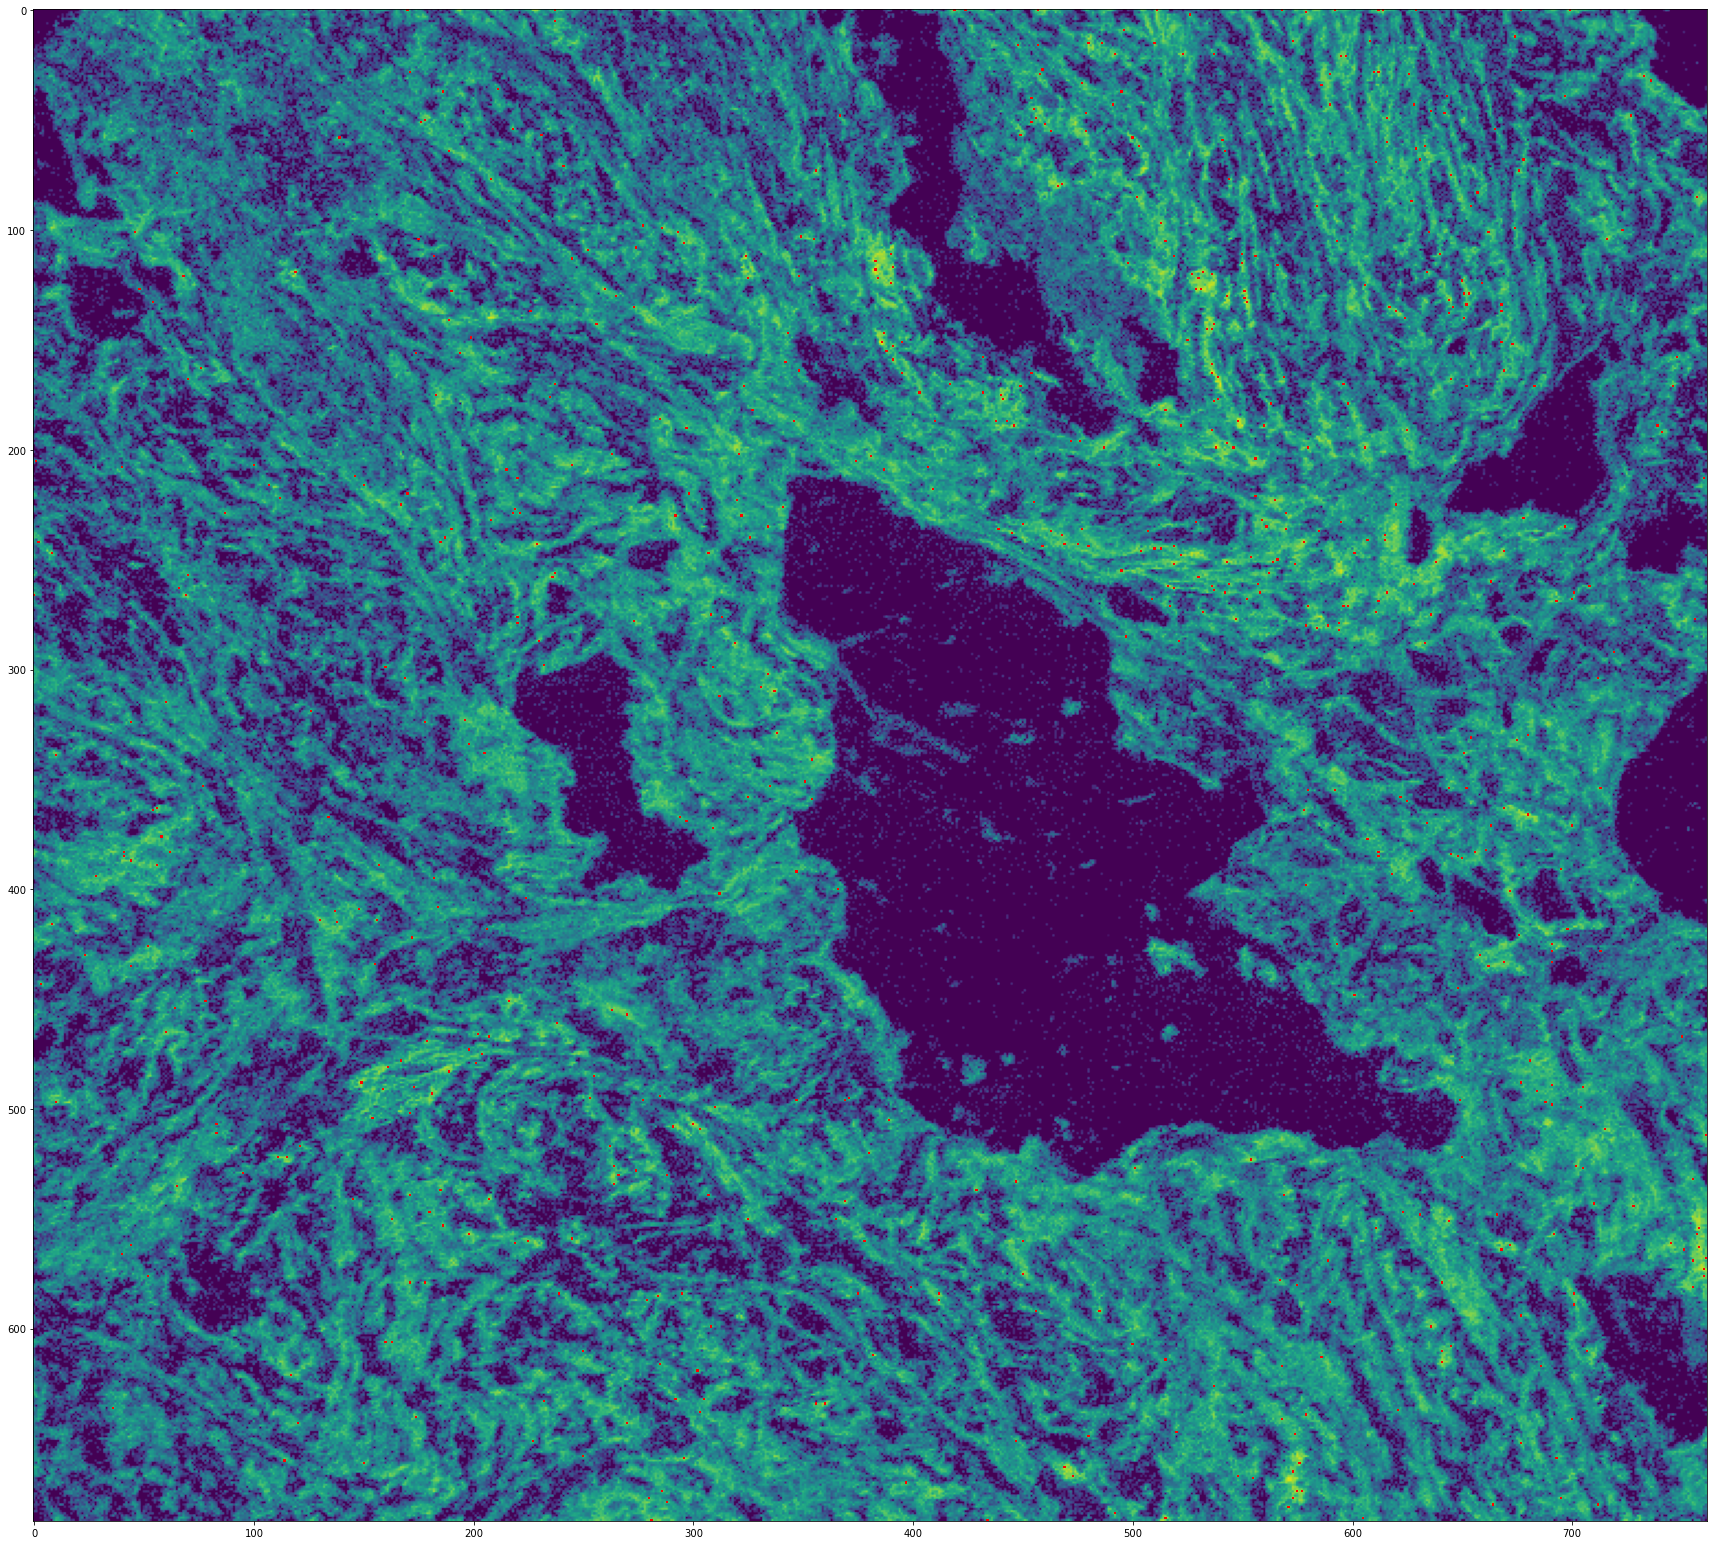

In [45]:
from data import OmeDatasetHotPixelsRemoved, OmeDataset

ds_a = OmeDataset('train')
ds_b = OmeDatasetHotPixelsRemoved('train')
print(len(ds_a))

i = 15
j = 20
mask = ds_a[i] != ds_b[i]
mask = mask.numpy()

plt.figure(figsize=(30, 30))
plt.imshow(np.arcsinh(ds[15][:, :, 20].numpy()))
import matplotlib.colors
cmap = matplotlib.colors.LinearSegmentedColormap.from_list('a', 
                                             [(0, '#00000000'),
                                              (1, '#ff0000ff')], N=2)
plt.imshow(mask[:, :, j], interpolation='nearest', cmap=cmap)
plt.show()

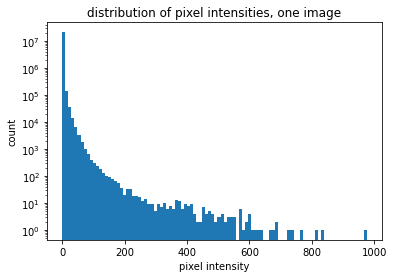

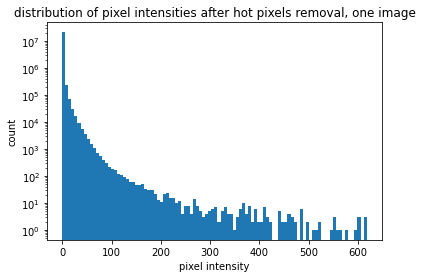

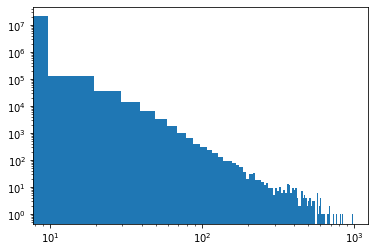

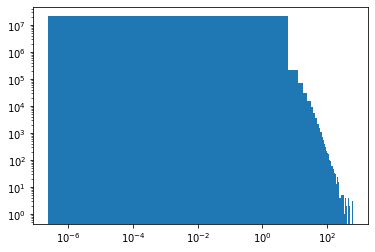

In [53]:
plt.hist(ds_a[0].numpy().flatten(), bins=100)
plt.yscale('log')
plt.title('distribution of pixel intensities, one image')
plt.xlabel('pixel intensity')
plt.ylabel('count')
plt.show()

plt.hist(ds_b[0].numpy().flatten(), bins=100)
plt.yscale('log')
plt.title('distribution of pixel intensities after hot pixels removal, one image')
plt.xlabel('pixel intensity')
plt.ylabel('count')
plt.show()

plt.hist(ds_a[0].numpy().flatten(), bins=100)
plt.yscale('log')
plt.xscale('log')
plt.show()

plt.hist(ds_b[0].numpy().flatten(), bins=100)
plt.yscale('log')
plt.xscale('log')
plt.show()

100%|██████████| 39/39 [00:08<00:00,  4.57it/s]


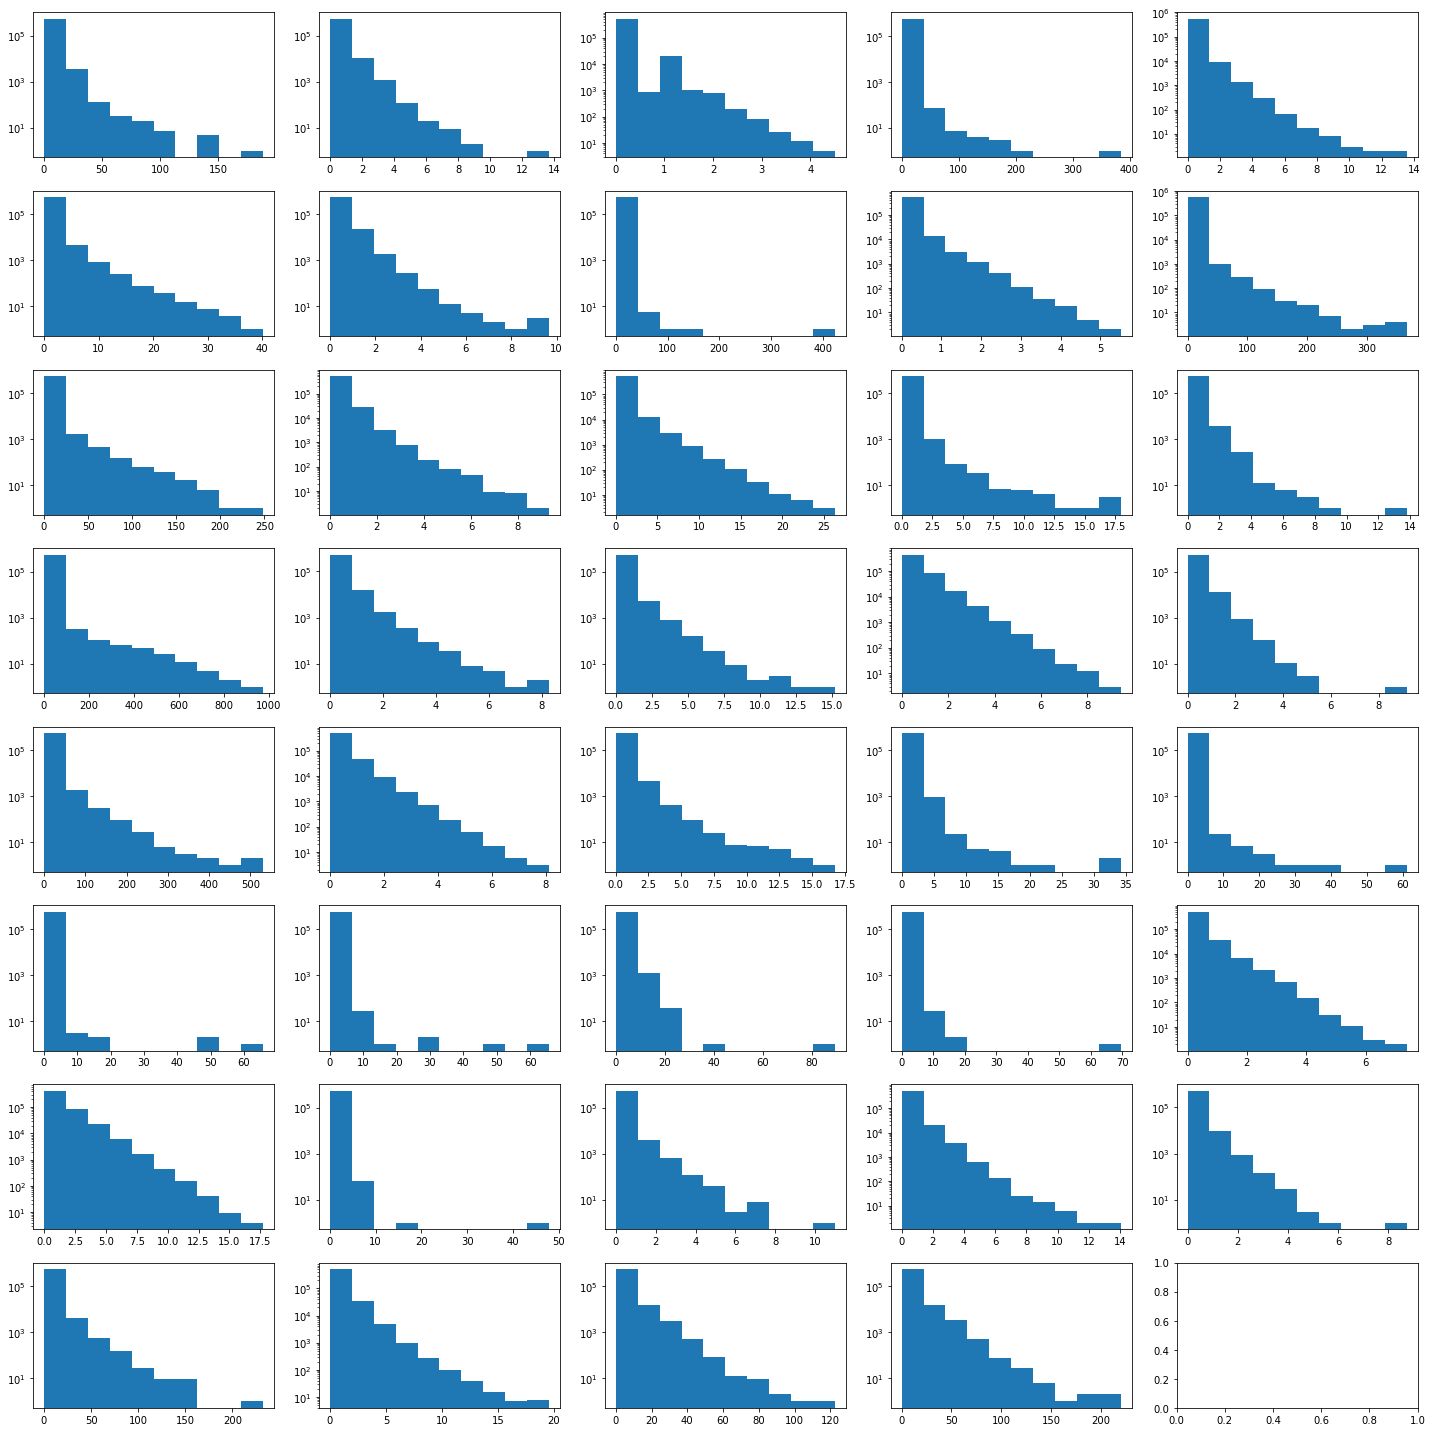

In [51]:
fig, axes = plt.subplots(8, 5, figsize=(20, 20))
axes = axes.flatten()
for i in tqdm(range(39)):
    ax = axes[i]
    ax.hist(ds_a[0][:, :, i].numpy().flatten())
    ax.set_yscale('log')
plt.tight_layout()
plt.show()

100%|██████████| 39/39 [00:13<00:00,  2.98it/s]


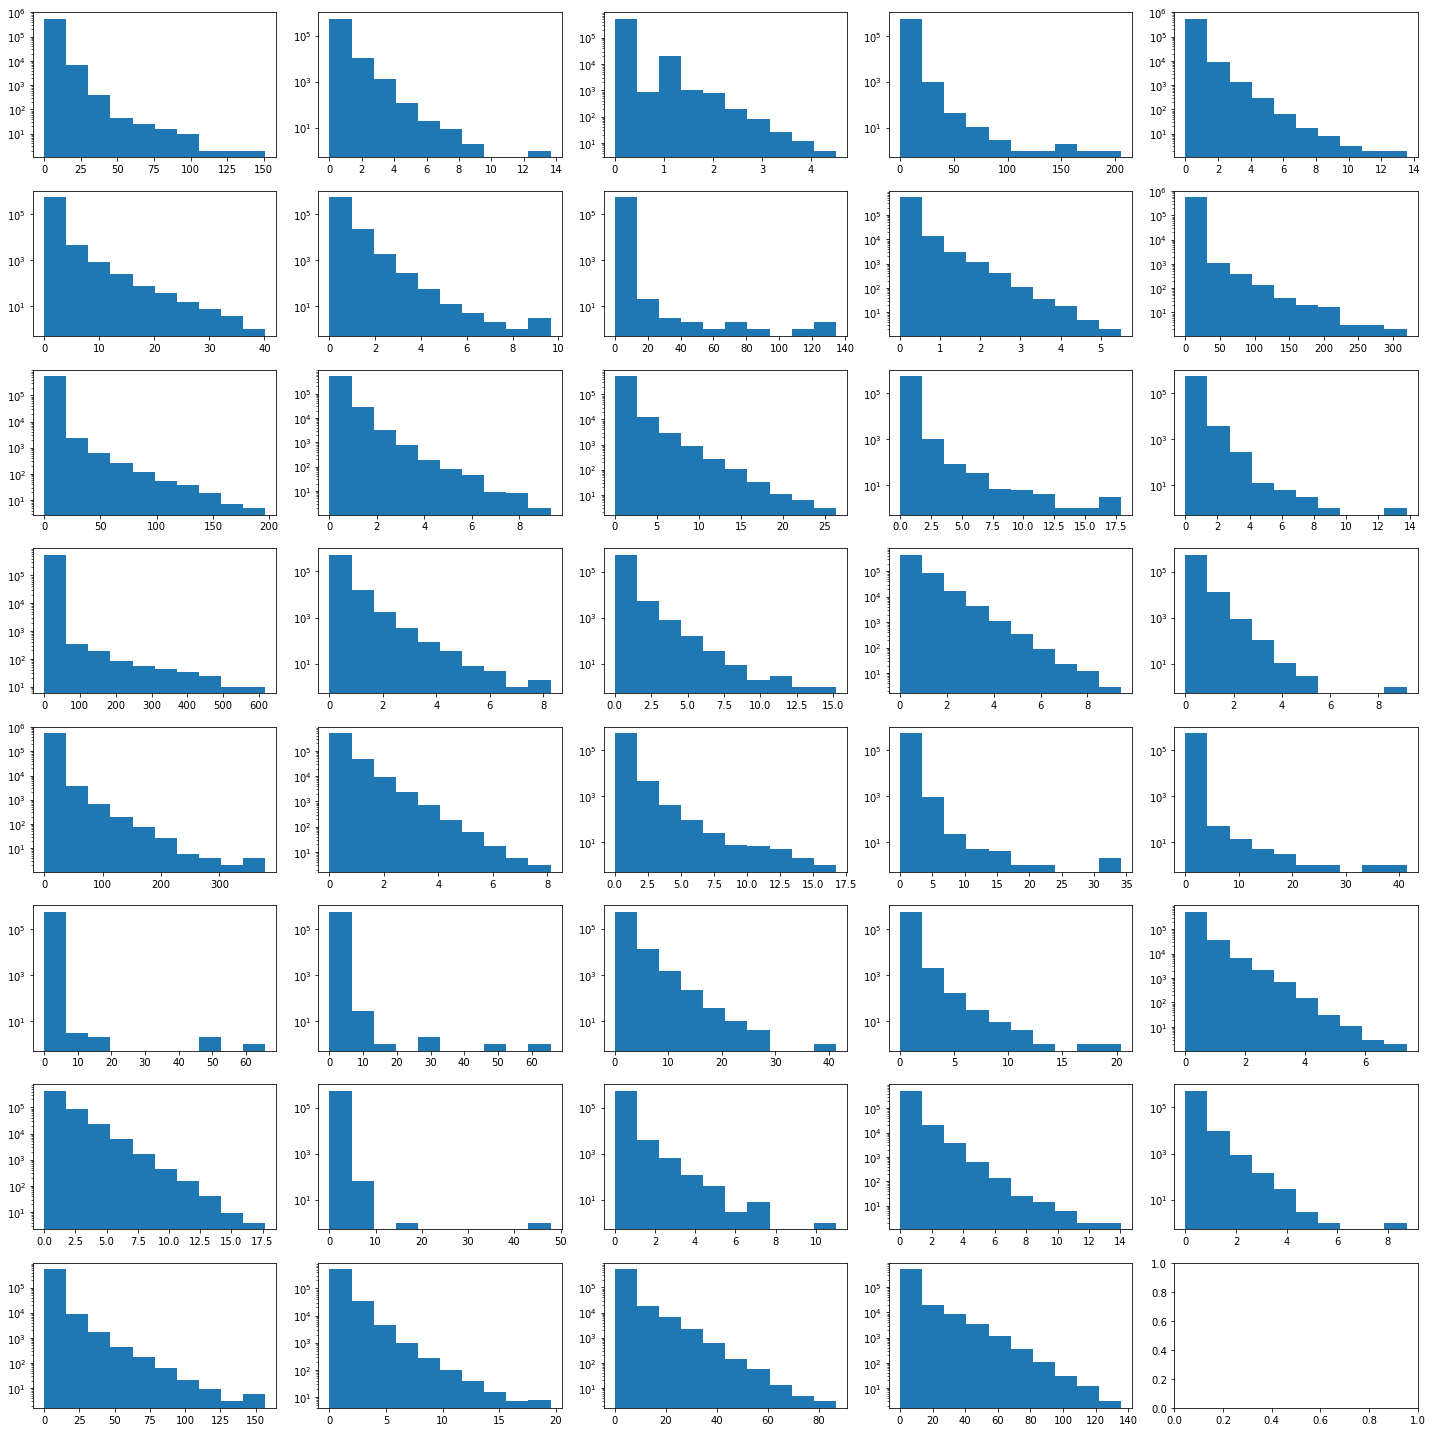

In [52]:
fig, axes = plt.subplots(8, 5, figsize=(20, 20))
axes = axes.flatten()
for i in tqdm(range(39)):
    ax = axes[i]
    ax.hist(ds_b[0][:, :, i].numpy().flatten())
    ax.set_yscale('log')
plt.tight_layout()
plt.show()

In [56]:
l = []
for d in tqdm(ds_b, desc='concatenating all pixels'):
    v = d.numpy().flatten()
    l.append(v)
s = 0
for ll in l:
    s += len(ll)
s
big_min = 1000000
big_max = -1
for ll in l:
    big_min = min(big_min, np.min(ll))
    big_max = max(big_max, np.max(ll))
a = np.arange(0, big_max, 10).tolist()
# b = np.arange(10000, big_max, 5000).tolist()
# print(a)
# print()
# print(b)
# print()
# bins = np.array(a + b)
bins = np.array(a)
# print(bins.tolist())

my_hist = np.zeros(len(bins) - 1, dtype='int32')
for ll in tqdm(l, desc='computing histogram'):
    h, c = np.histogram(ll, bins)
#     print(h)
#     print(c) 
    my_hist += h

computing histogram: 100%|██████████| 389/389 [02:12<00:00,  2.93it/s]


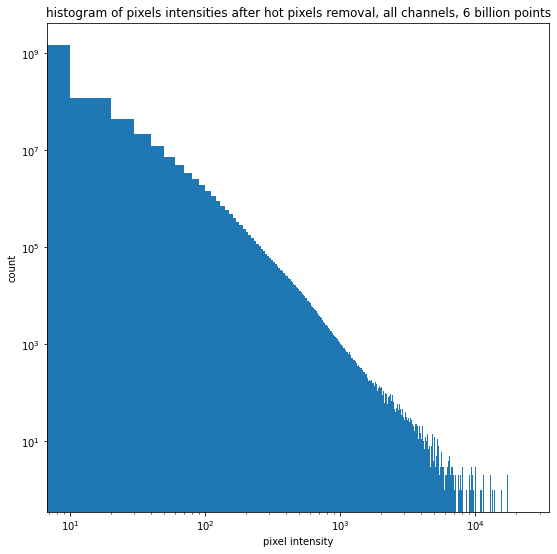

In [57]:
width = np.diff(bins)
center = (bins[:-1] + bins[1:]) / 2
plt.figure(figsize=(9, 9))
plt.bar(center, my_hist, align='center', width=width)
plt.title('histogram of pixels intensities after hot pixels removal, all channels, 6 billion points')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('pixel intensity')
plt.ylabel('count')
plt.show()

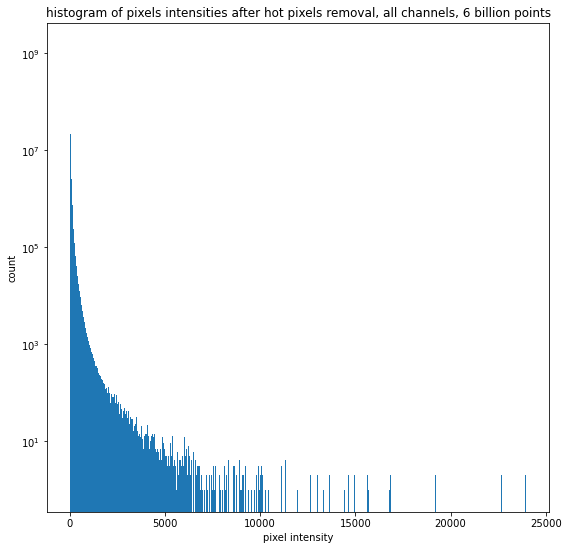

In [58]:
width = np.diff(bins)
center = (bins[:-1] + bins[1:]) / 2
plt.figure(figsize=(9, 9))
plt.bar(center, my_hist, align='center', width=width)
plt.title('histogram of pixels intensities after hot pixels removal, all channels, 6 billion points')
plt.yscale('log')
plt.xlabel('pixel intensity')
plt.ylabel('count')
plt.show()